<a href="https://colab.research.google.com/github/racoope70/Credit-Card-Fraud-Detection/blob/main/fraud_detection_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

# Step 3: Mount Google Drive
drive.mount('/content/drive')

# Load the uploaded Credit Card Fraud Detection dataset
file_path = '/content/drive/MyDrive/creditcard.csv'
credit_card_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
credit_card_data.head()


Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check for missing values in the dataset
missing_values = credit_card_data.isnull().sum()

# Check for duplicate entries
duplicate_entries = credit_card_data.duplicated().sum()

# Display the results of data cleaning checks
missing_values, duplicate_entries


(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
 1081)

In [ ]:
# Check for missing values and duplicates
missing_values = credit_card_data.isnull().sum().sum()
duplicate_entries = credit_card_data.duplicated().sum()

# Clean the data by removing duplicates
credit_card_data_cleaned = credit_card_data.drop_duplicates()

# Provide the results of the cleaning process
{
    "Missing Values": missing_values,
    "Duplicate Entries": duplicate_entries,
    "Shape Before Cleaning": credit_card_data.shape,
    "Shape After Cleaning": credit_card_data_cleaned.shape
}

{'Missing Values': 0,
 'Duplicate Entries': 1081,
 'Shape Before Cleaning': (284807, 31),
 'Shape After Cleaning': (283726, 31)}

<ipython-input-10-7887086400dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


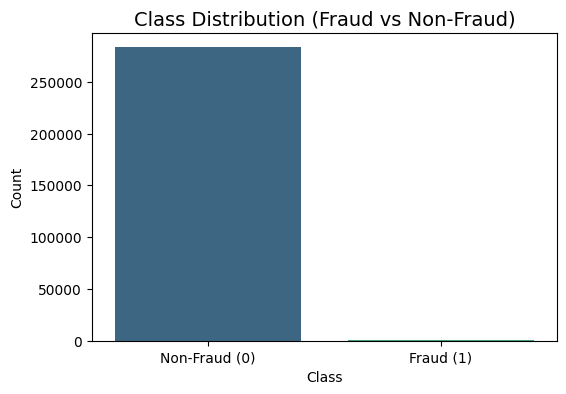

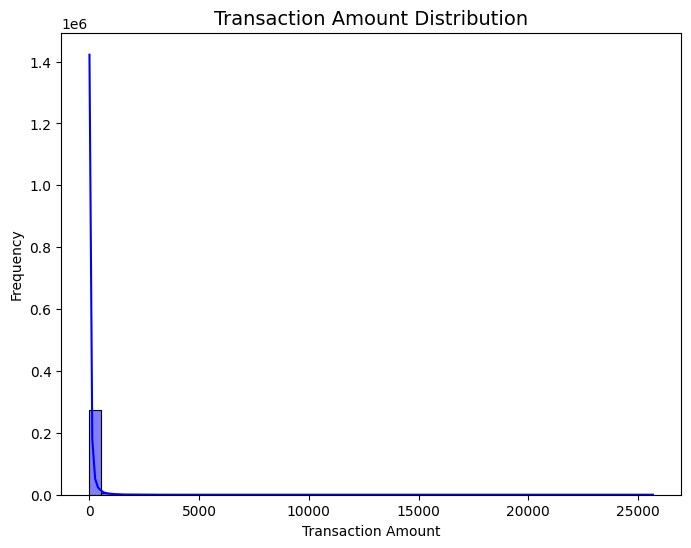

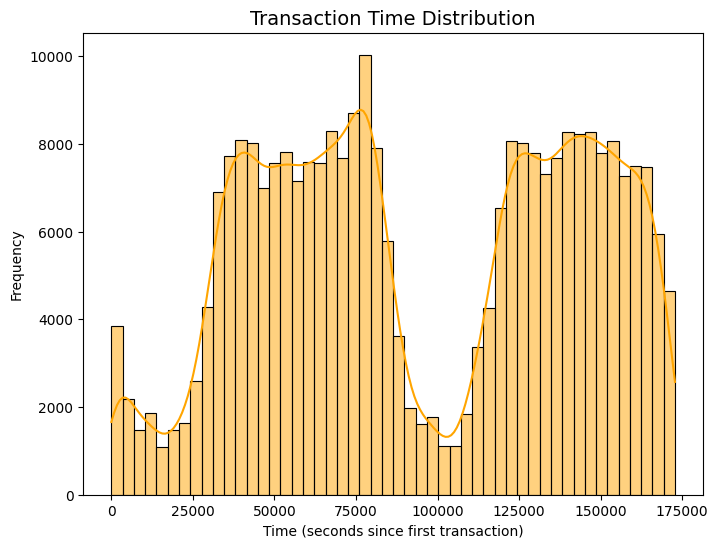

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
class_counts = credit_card_data_cleaned['Class'].value_counts()

# Plot the distribution of target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution (Fraud vs Non-Fraud)", fontsize=14)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

# Plot distribution of the transaction amount
plt.figure(figsize=(8, 6))
sns.histplot(credit_card_data_cleaned['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution', fontsize=14)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot transaction time distribution
plt.figure(figsize=(8, 6))
sns.histplot(credit_card_data_cleaned['Time'], bins=50, kde=True, color='orange')
plt.title('Transaction Time Distribution', fontsize=14)
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Descriptive Statistics
amount_stats = {
    "Min": credit_card_data_cleaned['Amount'].min(),
    "Max": credit_card_data_cleaned['Amount'].max(),
    "Mean": credit_card_data_cleaned['Amount'].mean(),
    "Median": credit_card_data_cleaned['Amount'].median(),
    "25th Percentile": credit_card_data_cleaned['Amount'].quantile(0.25),
    "75th Percentile": credit_card_data_cleaned['Amount'].quantile(0.75)
}

print(amount_stats)


{'Min': 0.0, 'Max': 25691.16, 'Mean': 88.47268731099724, 'Median': 22.0, '25th Percentile': 5.6, '75th Percentile': 77.51}


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split data into features and target
X = credit_card_data_cleaned.drop('Class', axis=1)
y = credit_card_data_cleaned['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 226597, 1: 226597})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train the Logistic Regression model
log_model = LogisticRegression(random_state=42, class_weight='balanced')
log_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nROC-AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))


Logistic Regression
Confusion Matrix:
 [[55473  1183]
 [   12    78]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.87      0.12        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


ROC-AUC Score: 0.9569249309673977


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Random Forest
Confusion Matrix:
 [[56652     4]
 [   19    71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.79      0.86        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score: 0.9545959631616933


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost with the updated method
xgb_model = XGBClassifier(tree_method='hist', device='cuda', random_state=42,
                          scale_pos_weight=len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1]))
xgb_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost (GPU)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


XGBoost (GPU)
Confusion Matrix:
 [[56642    14]
 [   19    71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.84      0.79      0.81        90

    accuracy                           1.00     56746
   macro avg       0.92      0.89      0.91     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score: 0.9676390065580972


In [ ]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [
        roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]),
    ],
    # Add more metrics like F1-Score if needed
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model   ROC-AUC
0  Logistic Regression  0.956925
1        Random Forest  0.954596
2              XGBoost  0.967639


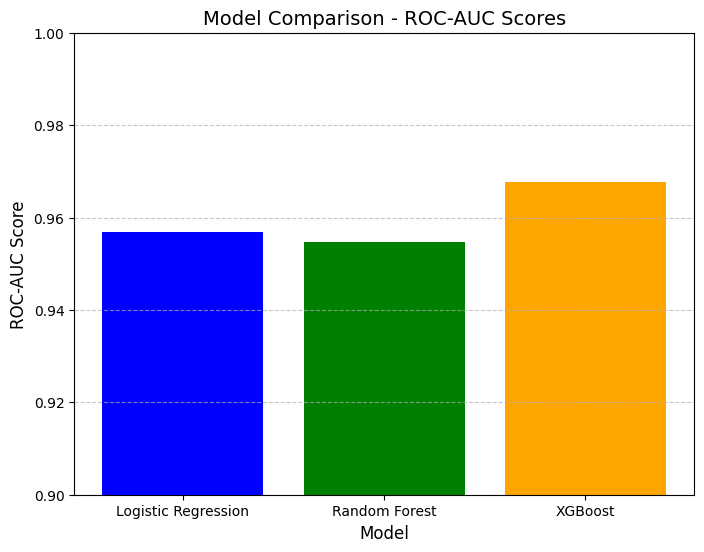

In [ ]:
#Visulization of model comparision

import matplotlib.pyplot as plt

# Data for visualization
models = ["Logistic Regression", "Random Forest", "XGBoost"]
roc_auc_scores = [0.956925, 0.954596, 0.967639]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, roc_auc_scores, color=['blue', 'green', 'orange'])
plt.title("Model Comparison - ROC-AUC Scores", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("ROC-AUC Score", fontsize=12)
plt.ylim(0.9, 1.0)  # Adjusting y-axis to focus on higher ROC-AUC values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from itertools import product
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize variables to track the best model and score
best_params = None
best_score = 0
best_model = None  # Initialize best_model as None

# Manually iterate over all combinations
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    model = XGBClassifier(tree_method='hist', device='cuda', random_state=42, **param_dict)
    model.fit(X_resampled, y_resampled)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_model = model  # Assign the best model

print("Best Parameters:", best_params)
print("Best ROC-AUC Score:", best_score)

# If using XGBoost
# Assign the best model for further evaluation
print("Best Model Assigned to 'best_model'")


Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8}
Best ROC-AUC Score: 0.9797439321911576
Best Model Assigned to 'best_model'


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Confusion Matrix:
 [[56315   341]
 [   14    76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.18      0.84      0.30        90

    accuracy                           0.99     56746
   macro avg       0.59      0.92      0.65     56746
weighted avg       1.00      0.99      1.00     56746


ROC-AUC Score: 0.9797439321911576


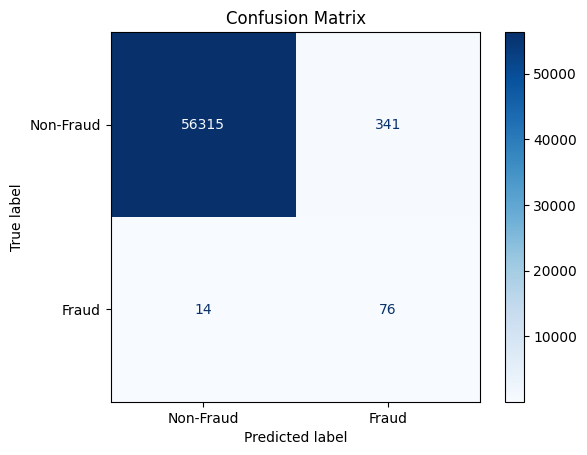

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


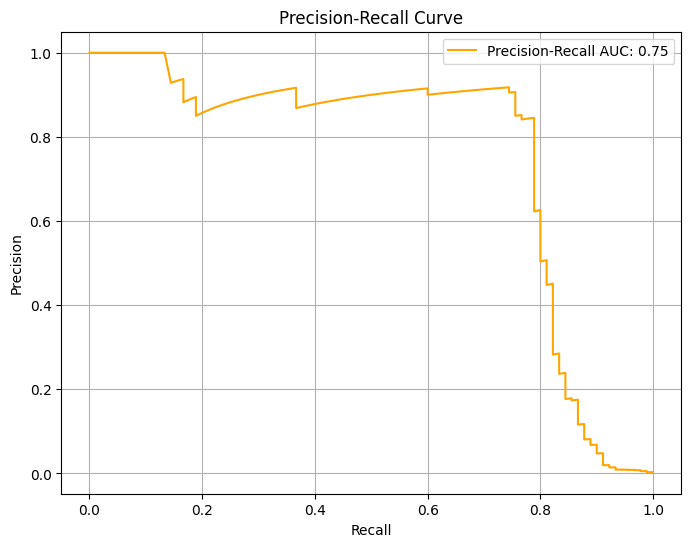

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall AUC: {pr_auc:.2f}", color='orange')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


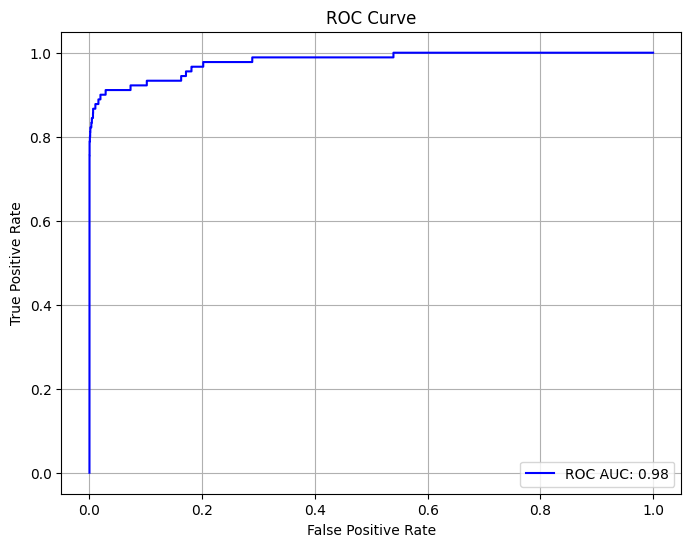

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.2f}", color='blue')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save cleaned data to Google Drive
file_path = '/content/drive/My Drive/cleaned_creditcard_data.csv'  # Adjust path as needed
credit_card_data_cleaned.to_csv(file_path, index=False)
print(f"Cleaned data saved to {file_path}")

Cleaned data saved to /content/drive/My Drive/cleaned_creditcard_data.csv


In [ ]:
import joblib

# Save the model to Google Drive
file_path = '/content/drive/My Drive/best_xgboost_model.pkl'  # Adjust path if needed
joblib.dump(best_model, file_path)
print(f"Model saved successfully at: {file_path}")


Model saved successfully at: /content/drive/My Drive/best_xgboost_model.pkl


In [ ]:
import os

# Verify the file exists
print(os.path.exists(file_path))


True


In [ ]:
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the test set
joblib.dump((X_test, y_test), '/content/drive/My Drive/X_test_y_test.pkl')
print("Test set saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Test set saved successfully.


In [ ]:
from google.colab import drive
import joblib

# Mount Google Drive
drive.mount('/content/drive')

# Save resampled data
joblib.dump((X_resampled, y_resampled), '/content/drive/My Drive/X_y_resampled.pkl')
print("Resampled data saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Resampled data saved successfully.


In [ ]:
# Save resampled data as CSV
X_resampled['Class'] = y_resampled  # Combine features and target
X_resampled.to_csv('/content/drive/My Drive/resampled_data.csv', index=False)
print("Resampled data saved successfully.")


Resampled data saved successfully.


In [ ]:
# Save split data
joblib.dump((X_train, X_test, y_train, y_test), '/content/drive/My Drive/train_test_split.pkl')
print("Train/test split saved successfully.")


Train/test split saved successfully.


In [ ]:
# Save the trained model
joblib.dump(best_model, '/content/drive/My Drive/best_xgboost_model.pkl')
print("Best model saved successfully.")


Best model saved successfully.
